## Name : Swapnil Ajit Chhatre
## Roll no. : 33213
## Division : TE - 10
## Batch : L - 10

### Subject : Laboratory Practice 1 (Machine Learning)
### Group : A
### Assignment 4 : Clustering using K means

Download the following customer dataset from below link: 
Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner. 

Apply at least two clustering algorithms (based on Spending Score) to find the group of customers. 

a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary.

b. Perform data-preparation( Train-Test Split)

c. Apply Machine Learning Algorithm 

d. Evaluate Model. 

e. Apply Cross-Validation and Evaluate Model

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv('E:\TE_IT_SEM_1\Lab_Practice\ML_Assignments\Mall_Customers.csv', index_col = 'CustomerID')
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


# 1. KMEANS CLUSTERING

### Encoding genre column

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
data['Genre'] = le.fit_transform(data['Genre'])

In [6]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


### Elbow method to find optimal number of clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
cluster = []

for k in range(1, 11):
    kmean = KMeans(n_clusters = k).fit(data)
    cluster.append(kmean.inertia_)

C:\Users\Swapnil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


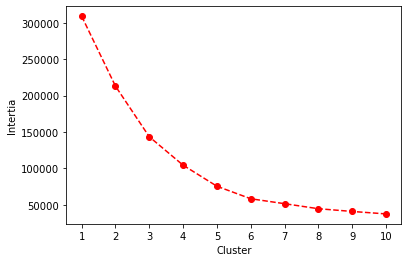

In [9]:
plt.plot(range(1, 11), cluster, 'ro--')
plt.xticks(range(1, 11))
plt.xlabel('Cluster')
plt.ylabel('Intertia');

### No. of clusters = 5

### Adding cluster labels column to the dataset

In [10]:
kmeans = KMeans(n_clusters = 5).fit(data)
data['Labels'] = kmeans.labels_

In [11]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),Labels
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,3
3,0,20,16,6,4
4,0,23,16,77,3
5,0,31,17,40,4
...,...,...,...,...,...
196,0,35,120,79,0
197,0,45,126,28,1
198,1,32,126,74,0


### Plotting the scatterplot for all clusters with hue according to the cluster labels

<Figure size 864x576 with 0 Axes>

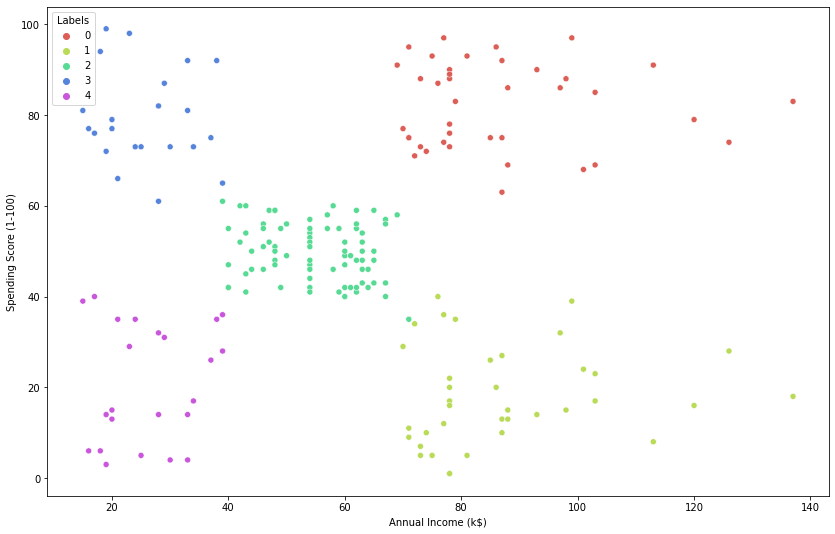

In [12]:
import seaborn as sns
plt.figure(figsize=(12, 8))
plt.figure(figsize = (14,9));
sns.scatterplot(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.show();


### Plotting centroids for the given clusters

In [13]:
X = data.iloc[:, [2,3]].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 10).fit(data)
y_kmeans = kmeans.fit_predict(X)

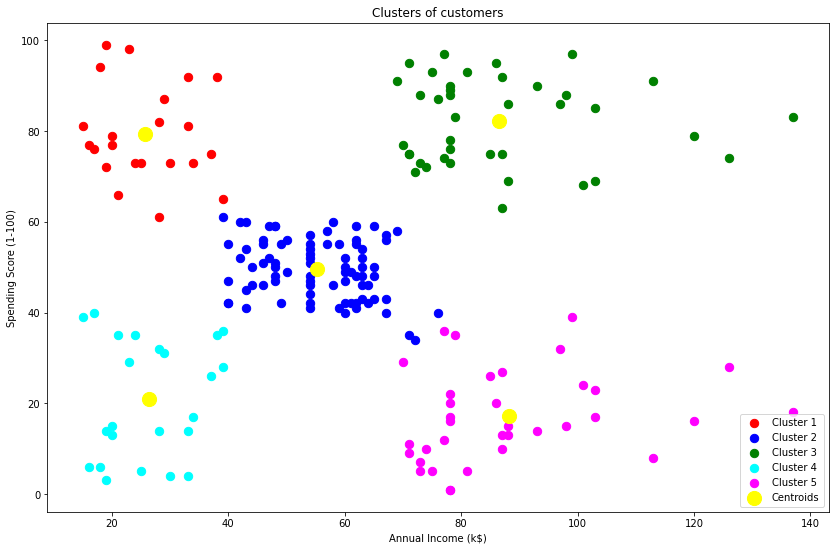

In [14]:
plt.figure(figsize = (14, 9))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 70, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 70, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 2. HIERARCHICAL CLUSTERING

In [15]:
dataNew = pd.read_csv('E:\TE_IT_SEM_1\Lab_Practice\ML_Assignments\Mall_Customers.csv')
dataNew

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [16]:
inputData = dataNew.iloc[:, [3, 4]].values

In [17]:
import scipy.cluster.hierarchy as shc

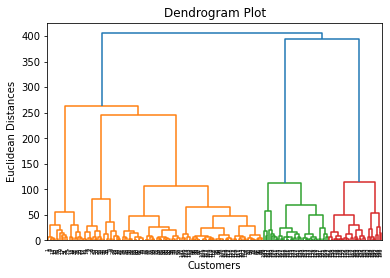

In [18]:
# Plotting the dendrogram
dendro = shc.dendrogram(shc.linkage(inputData, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(inputData)

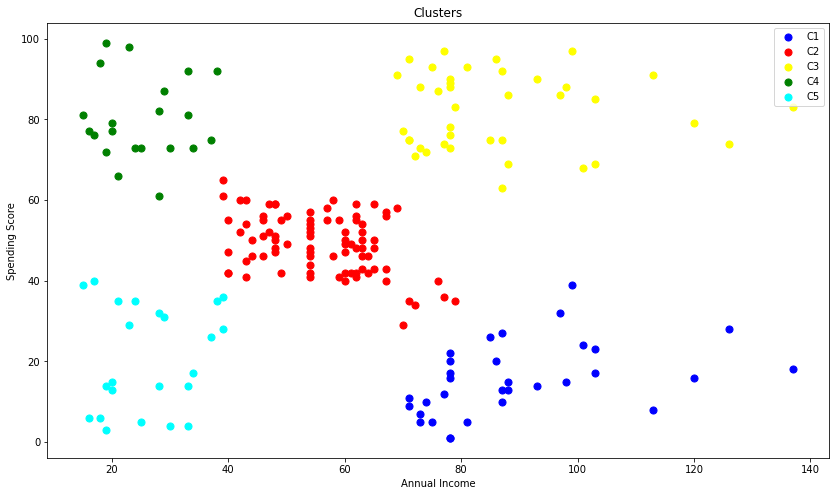

In [20]:
plt.figure(figsize = (14, 8))
plt.scatter(inputData[y_pred == 0, 0], inputData[y_pred == 0, 1], s = 50, c = 'blue', label = 'C1')
plt.scatter(inputData[y_pred == 1, 0], inputData[y_pred == 1, 1], s = 50, c = 'red', label = 'C2')
plt.scatter(inputData[y_pred == 2, 0], inputData[y_pred == 2, 1], s = 50, c = 'yellow', label = 'C3')
plt.scatter(inputData[y_pred == 3, 0], inputData[y_pred == 3, 1], s = 50, c = 'green', label = 'C4')
plt.scatter(inputData[y_pred == 4, 0], inputData[y_pred == 4, 1], s = 50, c = 'cyan', label = 'C5')
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend();

## Conclusion : In this assignment, I have successfully implemented the KMeans clustering algorithm and Hierarchichal clustering algorithm for clustering data of mall customers according to their spending scores